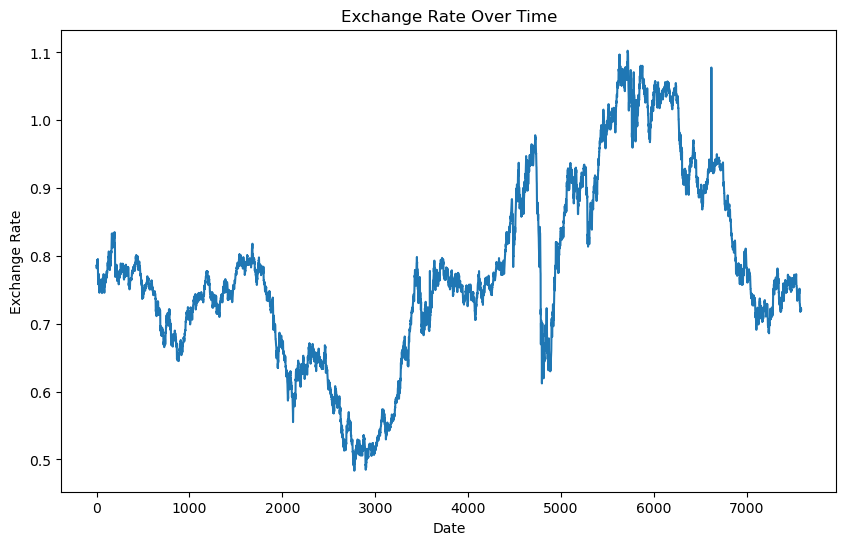

date       0
Ex_rate    0
dtype: int64


C:\Users\bhimr\AppData\Local\Temp\ipykernel_12316\2641626285.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ex_rate'] = df['Ex_rate'].fillna(method='ffill')


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\bhimr\\OneDrive\\Documents\\Timeseries\\exchange_rate.csv")

# Plot the time series to understand trends
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

# Check for missing values
print(df.isnull().sum())

# Fill missing values if any (using forward fill as an example)
df['Ex_rate'] = df['Ex_rate'].fillna(method='ffill')


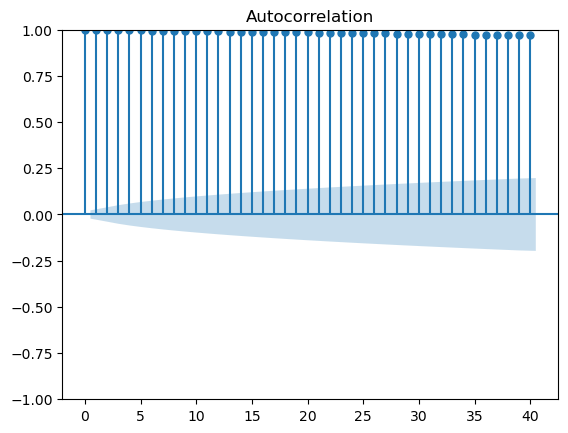

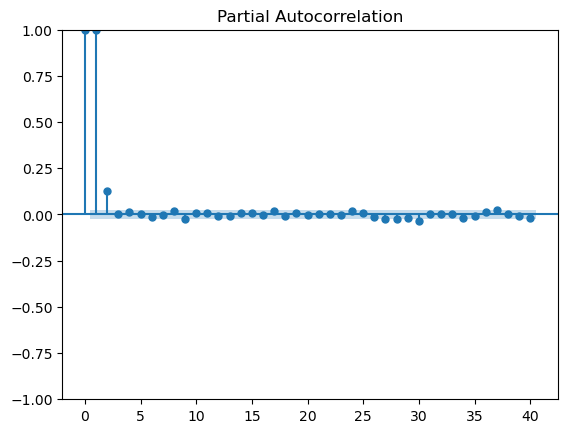

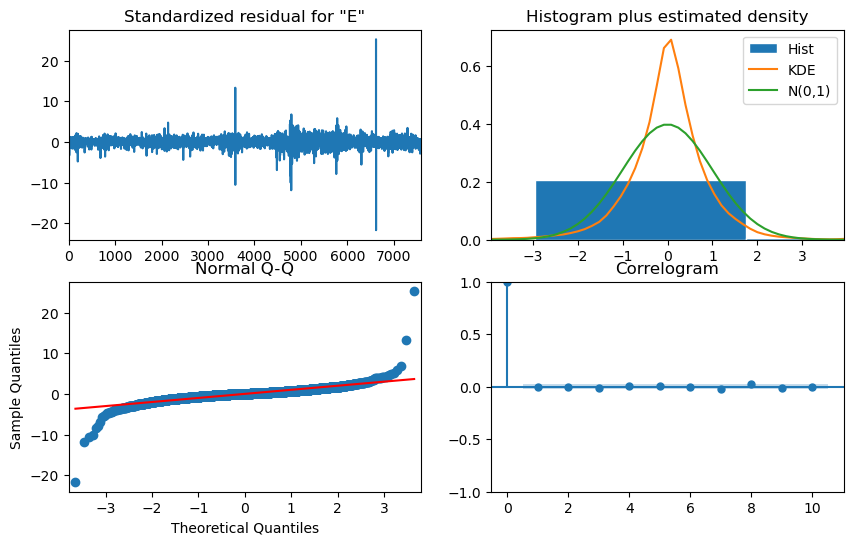

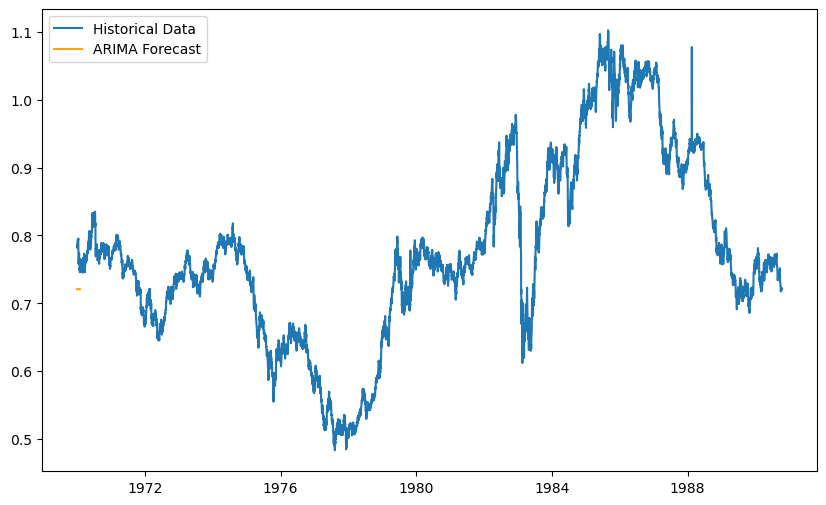

In [5]:
# Import ACF and PACF functions for ARIMA parameter selection
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Plot ACF and PACF to estimate p, d, q
plot_acf(df['Ex_rate'], lags=40)
plt.show()

plot_pacf(df['Ex_rate'], lags=40)
plt.show()

# Fit ARIMA model (Choose appropriate p, d, q after examining ACF/PACF)
model_arima = ARIMA(df['Ex_rate'], order=(1, 1, 1))  # Example (p=1, d=1, q=1)
model_arima_fitted = model_arima.fit()

# Plot residuals diagnostics to check model adequacy
model_arima_fitted.plot_diagnostics(figsize=(10, 6))
plt.show()

# Forecasting with ARIMA
forecast_arima = model_arima_fitted.forecast(steps=30)  # Forecast next 30 days
forecast_arima_index = pd.date_range(df.index[-1], periods=30, freq='D')

# Plot the ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical Data')
plt.plot(forecast_arima_index, forecast_arima, label='ARIMA Forecast', color='orange')
plt.legend()
plt.show()


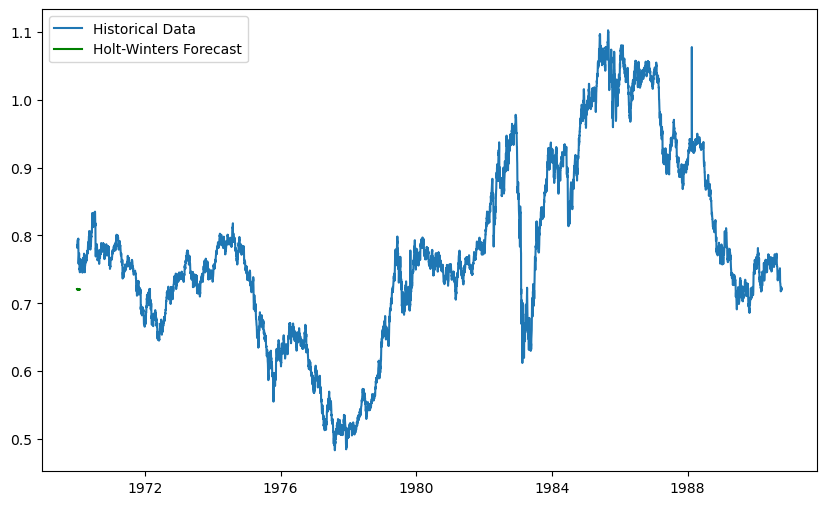

In [6]:
# Import Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model (using Holt-Winters with additive trend and seasonal components)
model_hw = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_hw_fitted = model_hw.fit()

# Forecasting with Holt-Winters
forecast_hw = model_hw_fitted.forecast(steps=30)  # Forecast next 30 days
forecast_hw_index = pd.date_range(df.index[-1], periods=30, freq='D')

# Plot the Holt-Winters forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical Data')
plt.plot(forecast_hw_index, forecast_hw, label='Holt-Winters Forecast', color='green')
plt.legend()
plt.show()


In [7]:
# Import necessary metrics for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming the actual future values (for evaluation purposes)
# You will need actual future data for this step
actual_values = df['Ex_rate'][-30:]  # Use the last 30 values for comparison in this example

# ARIMA evaluation
mae_arima = mean_absolute_error(actual_values, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(actual_values, forecast_arima))
mape_arima = np.mean(np.abs((actual_values - forecast_arima) / actual_values)) * 100

# Holt-Winters evaluation
mae_hw = mean_absolute_error(actual_values, forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(actual_values, forecast_hw))
mape_hw = np.mean(np.abs((actual_values - forecast_hw) / actual_values)) * 100

# Display the error metrics
print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
print(f"Holt-Winters MAE: {mae_hw}, RMSE: {rmse_hw}, MAPE: {mape_hw}")


ARIMA MAE: 0.01272400648930223, RMSE: 0.01698271091275075, MAPE: nan
Holt-Winters MAE: 0.012932067217159386, RMSE: 0.017165538375562603, MAPE: nan
